# **Ejercicio Suavización Exponencial Series de tiempo**

## Lina María Méndez López
#### Maestría en Inteligencia Artificial Aplicada
#### Universidad Icesi

🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦🟦

Este documento se realizala construcción de objetos de series de tiempo y el cálculo de pronósticos con modelos de suavización para dar respuesta al siguiente Ejercicio planteado:

### **Empleando la información del número de ocupados en miles de personas (Ocupados) para las 13 principales ciudades, encuentre el mejor pronóstico para los próximos 6 meses. Escriba un breve informe de máximo una página de texto que explique cómo llega a sus proyeccciones y presente las proyecciones. Aclare en el texto cuáles serían las limitaciones de sus pronósticos.**

Para este ejercicio emplearemos la información disponible en el archivo datosEmpleo.xlsx. En ese archivo se encuentra la tasa de desempleo mensual de las 13 principales ciudades en Colombia (TD_13ciudades), contiene series mensuales para las 13 principales ciudades de Colombia, el número de ocupados en miles de personas (Ocupados), los desocupados (Desocupados) y los inactivos (Inactivos).





---



---



## **1. Cargar y visualizar los datos**

         mes  TD_13ciudades  Ocupados  Desocupados  Inactivos
0 2001-01-01      20.946380  6923.604     1834.507   4600.718
1 2001-02-01      19.894213  7037.746     1747.820   4596.805
2 2001-03-01      19.221565  6945.973     1652.823   4807.120
3 2001-04-01      17.888575  6973.079     1519.137   4937.280
4 2001-05-01      17.945654  6994.462     1529.720   4928.911
(222, 5)


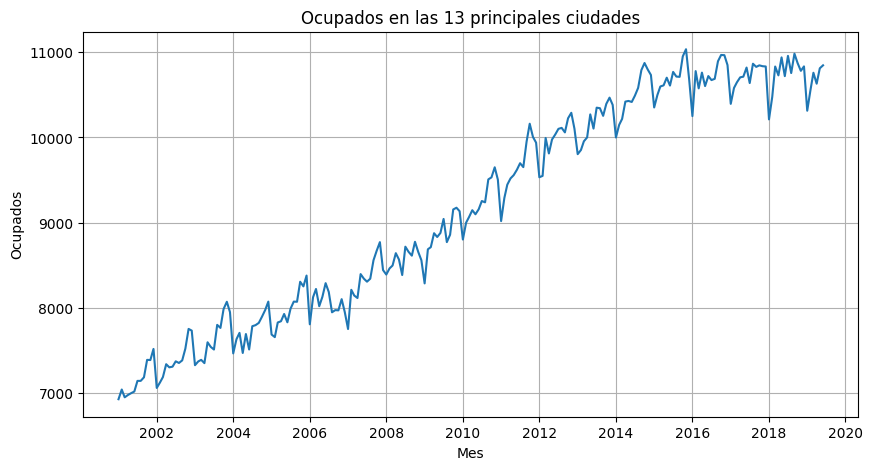

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Cargar datos
data = pd.read_excel("/content/drive/MyDrive/DatosParaEjercicios/datosEmpleo.xlsx", sheet_name=0)

# Revisar estructura
print(data.head())
print(data.shape)

# Asegurar que la columna de fecha esté en formato datetime y sea el índice
data['mes'] = pd.to_datetime(data['mes'])
data.set_index('mes', inplace=True)

# Graficar serie original
plt.figure(figsize=(10,5))
plt.title("Ocupados en las 13 principales ciudades")
plt.xlabel("Mes")
plt.ylabel("Ocupados")
plt.plot(data["Ocupados"])
plt.grid()
plt.show()


**Interpretación**

 La serie muestra un crecimiento a lo largo del tiempo, pero la amplitud de las oscilaciones no parece aumentar proporcionalmente al nivel, lo que sugiere que el modelo es aditivo.

 Se nota patrones que se repiten por año lo que indica estacionalidad.

## **2. Descomposición y desestacionalización**


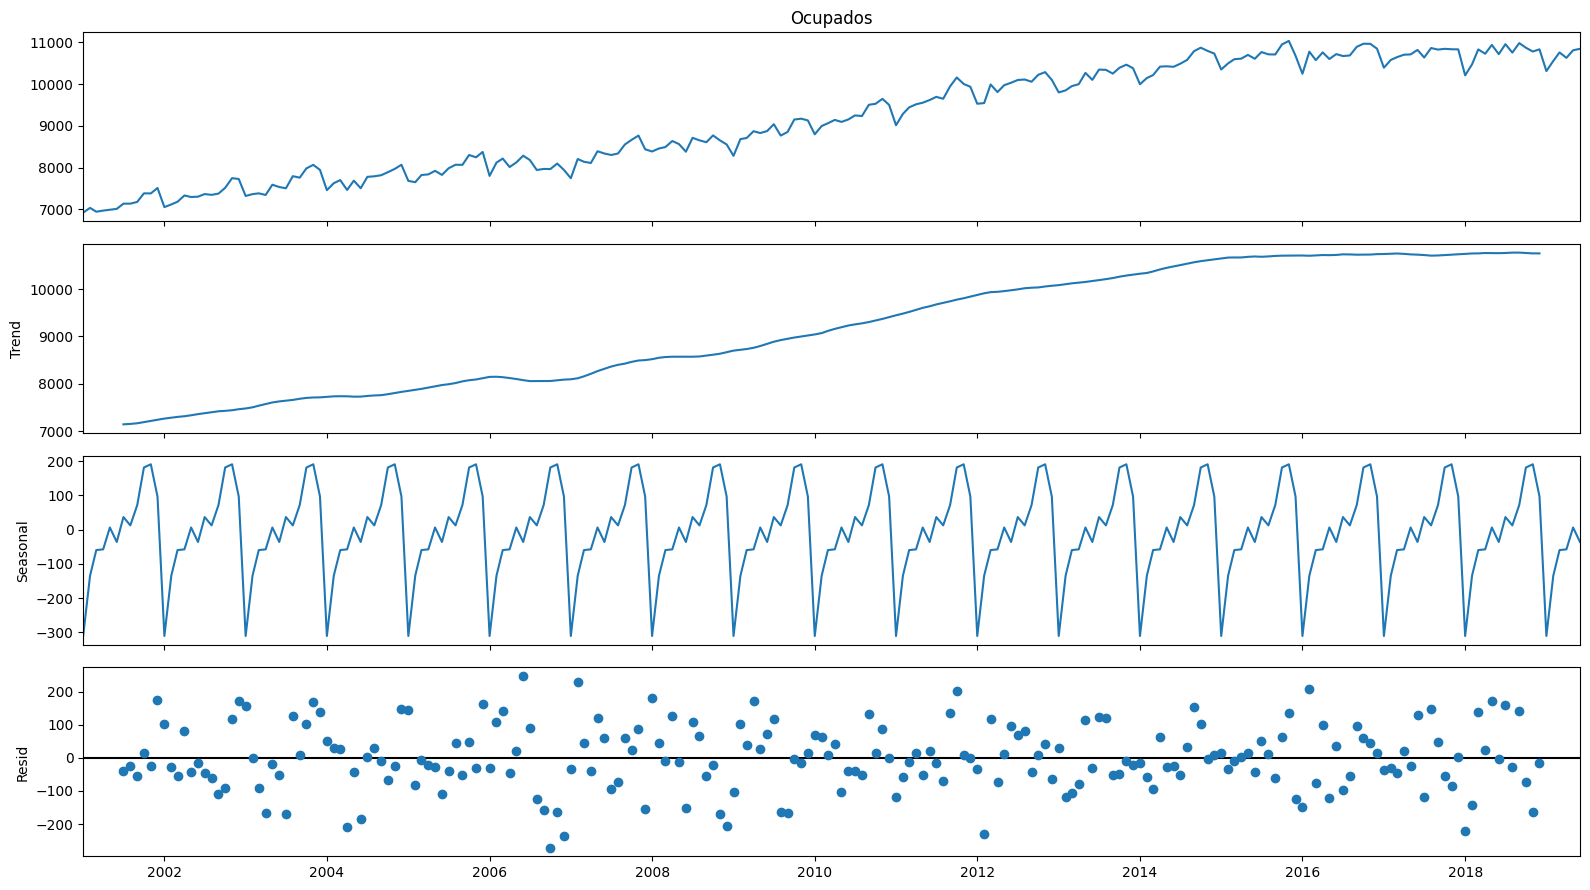

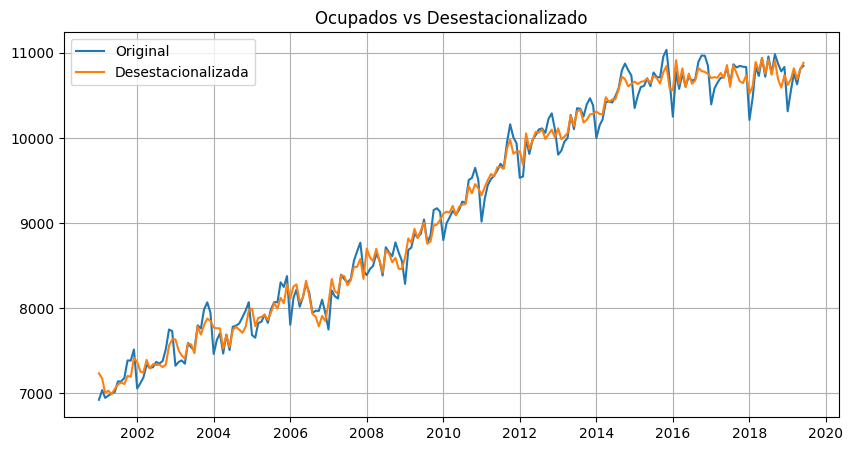

In [4]:
# Descomponer en componentes
td_componentes = seasonal_decompose(data["Ocupados"], model="additive")

# Graficar componentes
fig = td_componentes.plot()
fig.set_size_inches((16, 9))
fig.tight_layout()
plt.show()

# Desestacionalizar
td_desestacionalizada = data["Ocupados"] - td_componentes.seasonal

# Graficar comparativa
plt.figure(figsize=(10,5))
plt.plot(data["Ocupados"], label="Original")
plt.plot(td_desestacionalizada, label="Desestacionalizada")
plt.legend()
plt.grid()
plt.title("Ocupados vs Desestacionalizado")
plt.show()


**Interpretación**

Con la **Tendencia** observamos que es creciente desde 2001 hasta 2016, para luego estabilizarce en una constante aparentemente. Por tanto, esto sugiere que el número de Ocupados en las principales ciudades ya no crece más a partir del 2016.

En cuanto a la **Estacionalidad** hay un patrón definido por año. Muestra que en el segundo semestre de cada año hay un gran pico (aparentemente en los meses entre Octubre y mediados de Diciembre) esto sugiere un aumento de vacantes por temporadas como halloween y navidad.

Esta estacionalidad es aditiva (constante en magnitud, no se amplifica con el nivel), confirmando que el modelo aditivo es el adecuado.





## **3. Pronóstico con métodos de suavización**

### **3.1 Suavización exponencial simple**

🔧 ***Para qué sirve:***
Ideal para series sin tendencia ni estacionalidad. Se basa en dar más peso a los datos recientes para predecir los futuros.

📐 ***Cómo funciona:***
El pronóstico se calcula como un promedio ponderado donde los valores más recientes tienen mayor peso. Usa un solo parámetro $α$ (nivel de suavización).

📉 ***Limitación:***
⚠️ No captura ni tendencia ni estacionalidad. Útil solo si la serie es “plana”.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


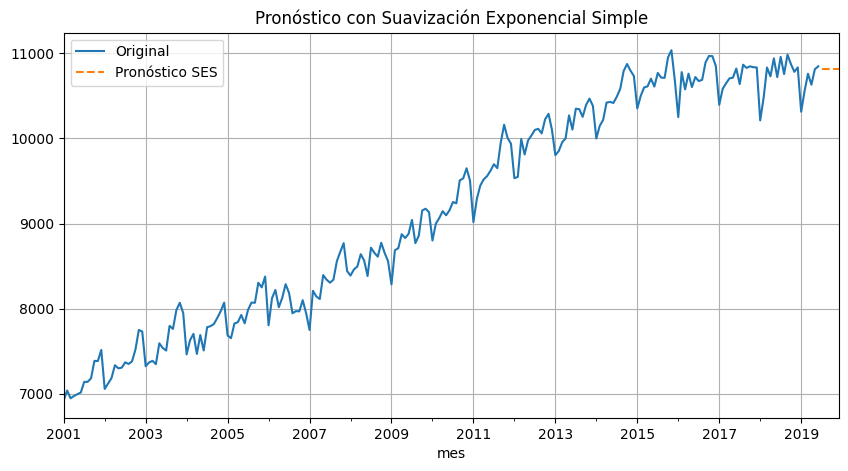

In [5]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

modelo1 = SimpleExpSmoothing(data["Ocupados"]).fit()
pred1 = modelo1.forecast(6)

data["Ocupados"].plot(label="Original", figsize=(10,5))
pred1.plot(label="Pronóstico SES", linestyle='--')
plt.legend()
plt.title("Pronóstico con Suavización Exponencial Simple")
plt.grid()
plt.show()


### **3.2 Modelo de Holt (Doble Exponencial)**

🔧 ***Para qué sirve:***
Ideal para series con tendencia pero sin estacionalidad.

📐 ***Cómo funciona:***
Agrega una segunda ecuación para capturar la tendencia de la serie, usando dos parámetros:
- $α$: suavización del nivel.

- $β$: suavización de la tendencia.

📈 ***Ventaja:***
Puede predecir crecimiento o decrecimiento continuo de manera más realista que SES.



/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


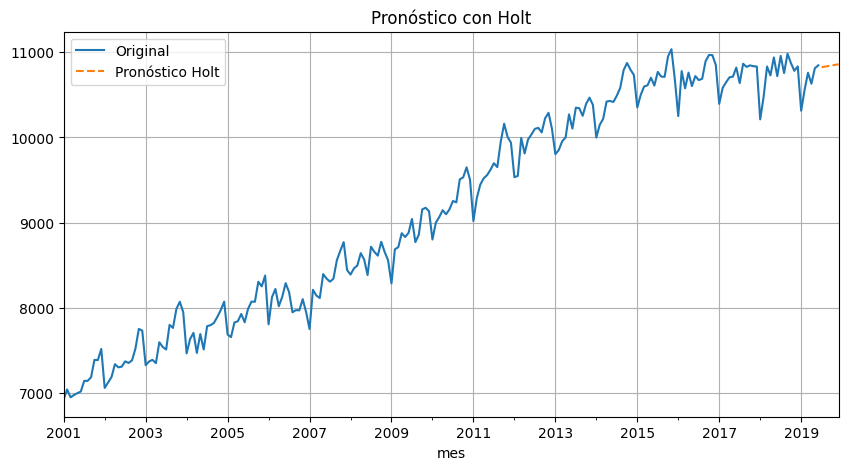

In [6]:
from statsmodels.tsa.holtwinters import Holt

modelo2 = Holt(data["Ocupados"]).fit()
pred2 = modelo2.forecast(6)

data["Ocupados"].plot(label="Original", figsize=(10,5))
pred2.plot(label="Pronóstico Holt", linestyle='--')
plt.legend()
plt.title("Pronóstico con Holt")
plt.grid()
plt.show()


### **3.3 Holt-Winters (captura tendencia + estacionalidad)**

🔧 ***Para qué sirve:***
Perfecto para series con tendencia y estacionalidad.

📐 ***Cómo funciona:***
Agrega un tercer componente para capturar la estacionalidad, usando tres parámetros:

- $α$: nivel.

- $β$: tendencia.

- $γ$: estacionalidad.

🧮 ***Tiene dos variantes:***

**Aditiva:** si la estacionalidad es constante.

**Multiplicativa:** si la estacionalidad se amplifica con el tiempo.

🌟 ***Ventaja:***
Es el más completo. Si está bien ajustado, genera pronósticos muy precisos.

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


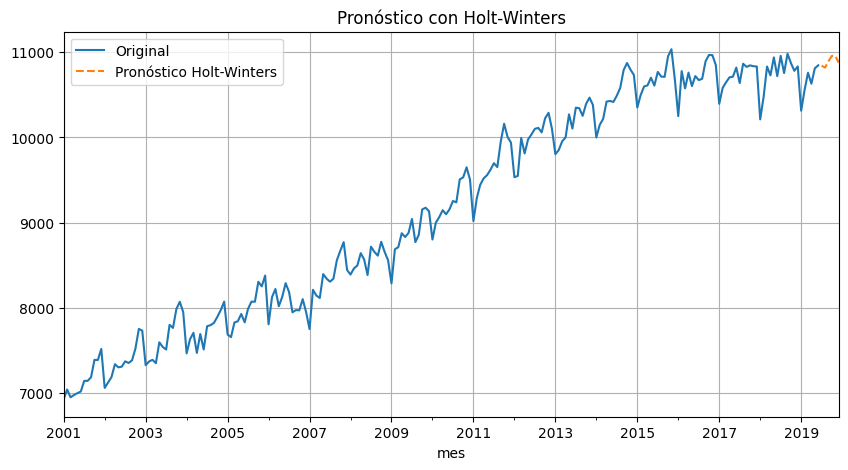

In [7]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

modelo3 = ExponentialSmoothing(data["Ocupados"], trend="add", seasonal="add", seasonal_periods=12).fit()
pred3 = modelo3.forecast(6)

data["Ocupados"].plot(label="Original", figsize=(10,5))
pred3.plot(label="Pronóstico Holt-Winters", linestyle='--')
plt.legend()
plt.title("Pronóstico con Holt-Winters")
plt.grid()
plt.show()


### **Interpretación de los modelos**

| Modelo                         | Comportamiento del Pronóstico                                      | Fortalezas                                                        | Debilidades                                         | ¿Es el adecuado para nuestro problema? |
| ------------------------------ | ------------------------------------------------------------------ | ---------------------------------------------------------------------- | ------------------------------------------------------------- | -------------------------- |
| **SES**<br>(Suav. Exp. Simple) | Línea horizontal constante (sin crecimiento, sin estacionalidad)   | Es simple                             | Ignora la tendencia y estacionalidad.    |  No  es adecuado              |
| **Holt**<br>(con tendencia)    | Captura la tendencia creciente. Pronóstico con pendiente moderada. | Reconoce bien la tendencia reciente.                                 | Ignora estacionalidad.  |  Parcialmente adecuado   |
| **Holt-Winters**<br>(aditivo)  | Pronóstico con pendiente y curvas estacionales realistas.          | Captura la tendencia y la estacionalidad anual.  Proyección más ajustada. |  Podría ser sensible a cambios estructurales o outliers.    | **El Más adecuado**             |


## **4. Comparar Modelos**

Se compara con el RMSE (Root Mean Squared Error) de cada uno para ver cuál se ajusta mejor al histórico.

In [8]:
from sklearn.metrics import mean_squared_error
import numpy as np

rmse1 = np.sqrt(mean_squared_error(data["Ocupados"][-6:], modelo1.fittedvalues[-6:]))
rmse2 = np.sqrt(mean_squared_error(data["Ocupados"][-6:], modelo2.fittedvalues[-6:]))
rmse3 = np.sqrt(mean_squared_error(data["Ocupados"][-6:], modelo3.fittedvalues[-6:]))

print(f"RMSE - SES: {rmse1:.2f}")
print(f"RMSE - Holt: {rmse2:.2f}")
print(f"RMSE - Holt-Winters: {rmse3:.2f}")


RMSE - SES: 243.76
RMSE - Holt: 249.46
RMSE - Holt-Winters: 87.93


El modelo de Holt-Winters aditivo confirma que es el mejor modelo arrojando el error menor con 87.93. Para la serie de tiempo que se trabaja captura la tendencia y estacionalidad.

## **5. Pronóstico con el modelo Holt-Winters para los próximos 6 meses**

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


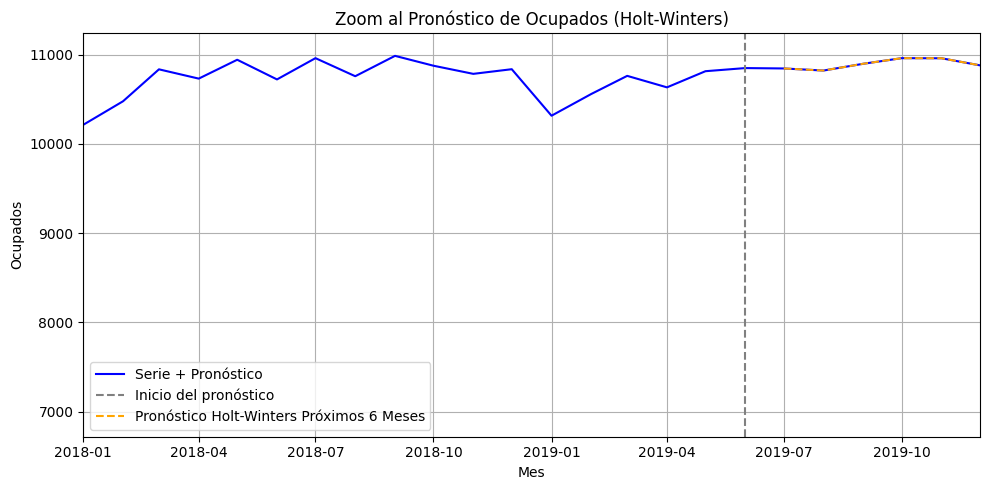

In [11]:
# Ajustar modelo Holt-Winters aditivo
modelo_hw = ExponentialSmoothing(
    data['Ocupados'],
    trend='add',
    seasonal='add',
    seasonal_periods=12
).fit()

# Pronóstico de los próximos 6 meses
pronostico_hw = modelo_hw.forecast(6)

# Concatenar original + pronóstico para graficar juntos
serie_completa = pd.concat([data['Ocupados'], pronostico_hw])

# Obtener fecha mínima para el zoom (últimos 18 meses)
fecha_inicio_zoom = data.index[-18]

# Gráfico centrado en el pronóstico
plt.figure(figsize=(10, 5))
plt.plot(serie_completa, label="Serie + Pronóstico", color="blue")
plt.axvline(x=data.index[-1], color='gray', linestyle='--', label="Inicio del pronóstico")
plt.plot(pronostico_hw, label='Pronóstico Holt-Winters Próximos 6 Meses', linestyle='--', color='orange')
plt.title("Zoom al Pronóstico de Ocupados (Holt-Winters)")
plt.xlabel("Mes")
plt.ylabel("Ocupados")
plt.xlim(fecha_inicio_zoom, pronostico_hw.index[-1])  # solo últimas fechas
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

### Mostrar los valores del pronóstico

In [15]:
# Mostrar los valores del pronóstico Holt-Winters
print("📅 Pronóstico de Ocupados (junio - noviembre 2019):")
# print(pronostico_hw)  # esto te da los valores pronosticados

#convertir los valores pronosticados en un dataframe ordenado
df_pronostico = pronostico_hw.reset_index() # te da los valores pronosticados pero ordenados en tabla
df_pronostico.columns = ['Mes', 'Ocupados Pronosticados']
print(df_pronostico)

#Sacar la mediana del pronóstico
mediana_pronostico = pronostico_hw.median()
print(f"🔸 Mediana del pronóstico (6 meses): {mediana_pronostico:.2f}")




📅 Pronóstico de Ocupados (junio - noviembre 2019):
         Mes  Ocupados Pronosticados
0 2019-07-01            10843.735540
1 2019-08-01            10820.399204
2 2019-09-01            10896.311090
3 2019-10-01            10959.064303
4 2019-11-01            10957.906359
5 2019-12-01            10878.548189
🔸 Mediana del pronóstico (6 meses): 10887.43


# **Resultado del Ejercicio**

Con base en el modelo Holt-Winters aditivo, se estima que el número de ocupados en las 13 principales ciudades de Colombia se mantendrá alrededor de los 10887 miles durante el segundo semestre de 2019.

La serie proyecta un comportamiento estacional estable y una ligera tendencia positiva, con valores entre 10844 y 10898 miles de ocupados entre junio y noviembre de 2019.

# **Limitaciones del pronóstico**

- El modelo parte del supuesto de que los patrones históricos (tendencia y estacionalidad) se mantendrán en el corto plazo.

- No considera eventos externos, como crisis económicas, reformas laborales, cambios políticos,etc.

- Holt-Winters es sensible a cambios estructurales recientes y datos atípicos.

- Se utilizó un enfoque univariado, por lo que no se consideran variables externas que podrían afectar el mercado laboral.

